In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bary_weights(x):
    '''Compute the barycentric weights given a sequence of distinct x values.

    Parameter:
        x (ndarray(dtype=float)): distinct x-values
    Return:
        weights (ndarray(dtype=float)): weights in the same order as x
    '''

    # Create a set of the points in x for easy iteration with set minus later
    x_set = set(x)

    # Check if there's a duplicate point in x
    if len(x) != len(x_set):
        raise ValueError('duplicate present in x')

    # Init list of weights
    weights = [None] * len(x)

    # Use formula to calculate each weight
    for i, x_j in enumerate(x):
        weights[i] = np.product(
            np.fromiter(
                ( 1/(x_j - x_k) for x_k in x_set - {x_j} ), 
                dtype=float
            )
        )

    return weights

def eval_poly(x, y, x0):
    '''Use bary_weights and the barycentric construction to evaluate the unique
    interpolating polynomial of points {(x_0, y_0), ..., (x_n, y_n)}.
    
    Parameters:
        x (ndarray(dtype=float)): distinct x-values
        y (ndarray(dtype=float)): y-values corresponding to x-values
        x0 (float or ndarray(dtype=float)): the point(s) at which to evaluate the interpolating polynomial
    Return:
        y0 (float or ndarray(dtype=float)): the evaluation of the interpolating polynomial at x0
    '''

    x = np.array(x)
    y = np.array(y)

    # Record whether given one x0 value to evaluate at (to determine return format)
    single_x0 = False

    # Turn x0 into an ndarray to keep later code consistent
    if isinstance(x0, (int, float)):
        x0 = np.array([x0], dtype=float)
        single_x0 = True
    elif len(x0) == 1:
        single_x0 = True
    
    # Create y0 in shape of x0 full of zeros as placeholder
    y0 = np.full_like(x0, 0)

    # The list of indices of x0 that must be computed rather than looked-up from y0
    indices_todo = list()

    # For each x_val in x0, check if x_val is in x, and update y0 with these already-known values
    for i, x_val in enumerate(x0):
        index = np.nonzero(x==x_val)[0]
        if len(index) != 0:
            y0[i] = y[index]
        else:
            indices_todo.append(i)
    
    # Get the remaining x0
    x0_todo = x0[indices_todo]

    # Compute weights
    weights = bary_weights(x)
    
    # Evaluate the polynomial interpolation at each remaining x-value in x0_todo
    for i, x0_todo_val in zip(indices_todo, x0_todo):
        summands = np.array(np.fromiter(
            (wj/(x0_todo_val-xj) for wj, xj in zip(weights, x)),
            dtype=float)
        )
        y0[i] = sum(y * summands)/sum(summands)
    
    # If originally given a single x-value, return a single y-value; otherwise, return an ndarray
    return y0 if not single_x0 else y0[0]

# 9.25
Use barycentric Lagrange interpolation to find the degree-3 interpolating polynomial for the data

$(-1, \sin(-\pi)), (-1/3, \sin(-\pi/3)), (1/3, \sin(\pi/3)), (1, \sin(\pi))$;

that is, interpolate through the points $\{(x_j, \sin(\pi x_j)\}_{j=0}^3\}$ for $x_0=-1, x_1=-1/3, x_2=1/3, x_3=1$.

Plot your answer and the function $\sin(\pi x)$ on the interval $[-1,1]$.

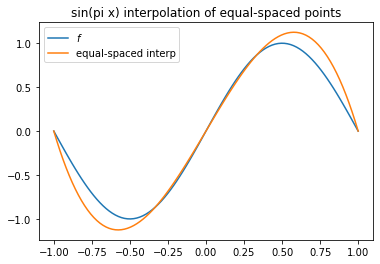

In [3]:
# Function to interpolate
f = lambda x: np.sin(np.pi * x)

# Number of points to use in drawing plot, and get domain points
NUM_PLOT_POINTS = 100
domain = np.linspace(-1, 1, NUM_PLOT_POINTS)

# Four equally spaced interpolating points on [-1, 1]
interp = np.linspace(-1, 1, 4)

# Plot
plt.plot(domain, f(domain), label='$f$')
plt.plot(domain, eval_poly(interp, f(interp), domain), label='equal-spaced interp')

# Legend, show
plt.legend()
plt.title('sin(pi x) interpolation of equal-spaced points')
plt.show()

# 9.26
Repeat the previous problem, but instead use the Chebyshev extremizers $y_j = \cos(j \pi/3)$;

that is, interpolate through the points $\{(y_j, \sin(\pi y_j))\}_{j=0}^3$ on the interval $[-1,1]$.

Plot your answer along with the function $\sin(\pi x)$ and your answer to the previous problem.

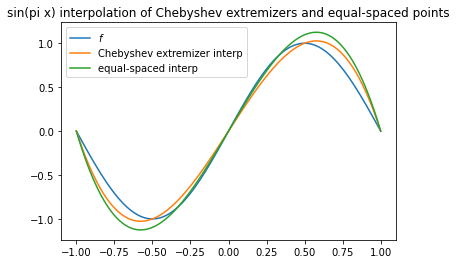

In [4]:
# Function to interpolate
f = lambda x: np.sin(np.pi * x)

# Number of points to use in drawing plot, and get domain points
NUM_PLOT_POINTS = 100
domain = np.linspace(-1, 1, NUM_PLOT_POINTS)

# Four Chebyshev extremizers as interpolating points
n=4
interp = np.array(np.fromiter(
    (np.cos(j * np.pi/(n-1)) for j in range(0, n)), dtype=float
))

# Plot f
plt.plot(domain, f(domain), label='$f$')

# Plot interpolation
plt.plot(domain, eval_poly(interp, f(interp), domain), label='Chebyshev extremizer interp')

# Plot interpolation from previous problem
prev_interp = np.linspace(-1, 1, 4)
plt.plot(domain, eval_poly(prev_interp, f(prev_interp), domain), label='equal-spaced interp')

# Legend and show
plt.legend()
plt.title('sin(pi x) interpolation of Chebyshev extremizers and equal-spaced points')
plt.show()

# 9.28

Let $\{z_i'\}_{i=1}^{20}$ be the points in $[1,20]$ corresponding to the degree-20 Chebyshev zeros.

Plot the polynomial $q(x) = \prod_{i=1}^{20} (x-z_i')$ on the interval $[1,20]$ and plot the Wilkinson polynomial $W(x)$ on the same graph.

Compute $\sup_{x \in [1,20]} |q(x)|$, and compare this to $\sup_{x \in [1, 20]} |W(x)|$.

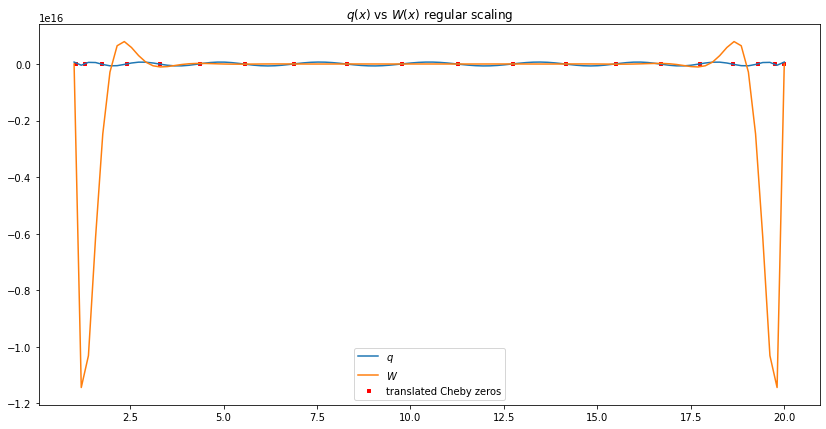

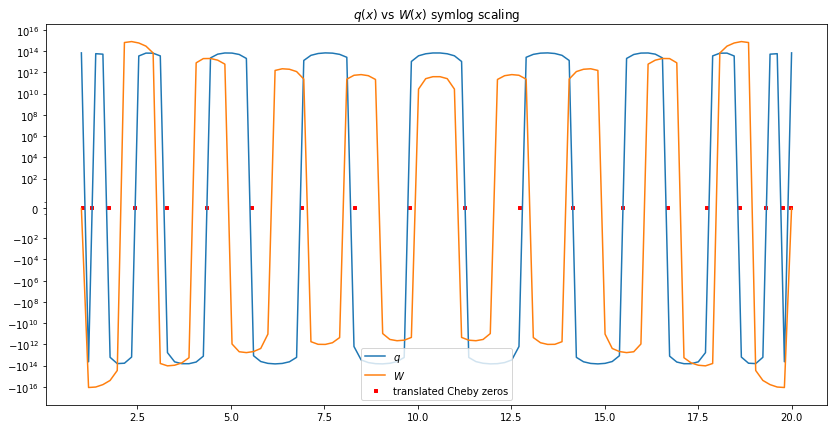

sups over [1,20]
sup|q| = 68375763398846.75
sup|W| = 1.143795690328651e+16
sup|W| / sup|q| = 167.28086583205047


In [61]:
# New interval
a, b = 1, 20

# Linear transformation [-1, 1] -> [a, b]
g = lambda t: a + (t+1)*(b-a)/2

### Get Chebyshev zeros z_j and translated Chebyshev zeros z'_j
# 20 Chebyshev zeros
n = 20
cheby = np.array(np.fromiter(
    (np.cos(np.pi/n * (j+1/2)) for j in range(0, n)), dtype=float
))
# 20 translated Chebyshev zeros as interpolating points
t_cheby = g(cheby)

# Define vectorized q
q = np.vectorize(lambda t: np.prod(np.fromiter(
    ( (t-zj) for zj in t_cheby), dtype=float
)))

# Define vectorize W
W = np.vectorize(lambda t: np.prod(np.fromiter(
    ( (t-i) for i in range(1, 20+1)), dtype=float
)))

# Number of points to use in drawing plot, and get domain points
NUM_PLOT_POINTS = 100
domain = np.linspace(a, b, NUM_PLOT_POINTS)

# y-values
y_q = q(domain)
y_W = W(domain)

# Set fig size
plt.rcParams["figure.figsize"] = (14, 7)

##### Plot regular scaling
plt.plot(domain, y_q, label='$q$')
plt.plot(domain, y_W, label='$W$')
plt.scatter(t_cheby, np.zeros(20), marker=',', s=9, c='r', label='translated Cheby zeros')

# Legend, show
plt.legend(loc='lower center')
plt.title('$q(x)$ vs $W(x)$ regular scaling')
plt.show()

##### Plot symlog
plt.plot(domain, y_q, label='$q$')
plt.plot(domain, y_W, label='$W$')
plt.scatter(t_cheby, np.zeros(20), marker=',', s=9, c='r', label='translated Cheby zeros')

# Change to symlog, change y ticks (remove -10**0 and 10**0 to clean up cluttered ticks)
plt.yscale('symlog')
plt.yticks(np.delete(plt.yticks()[0], [8,10]))

# Legend, show
plt.legend(loc='lower center')
plt.title('$q(x)$ vs $W(x)$ symlog scaling')
plt.show()

# Print sups
print('sups over [1,20]')
print(f'sup|q| = {(m := max(np.abs(y_q)))}')
print(f'sup|W| = {(n := max(np.abs(y_W)))}')
print(f'sup|W| / sup|q| = {n/m}')